<a href="https://colab.research.google.com/github/Whaleman0423/class_no.4_paper/blob/main/transfer_mobilenet_scooter1103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import os
os.chdir("/content/drive/MyDrive/Tebame_第四組_機車辨識")

In [3]:
# 600以上 : S2、GP、KRV、FIDDLE、SR、活力、新名流、DRG、新迪爵、LIMI、六代勁戰
s2 = glob.glob("./原始照片(含外拍及網路)/GOGORO_S2/*") + glob.glob("./裁剪照片(不含不用裁的)/GOGORO_S2_裁/*") 
s2_ = []
for i in range(len(s2)):
  if "JPG" in s2[i] or "jpg" in s2[i]:
    s2_.append(s2[i])
s2 = s2_

gp = glob.glob("./原始照片(含外拍及網路)/KYMCO_GP/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_GP_125_裁/*") 

krv = glob.glob("./原始照片(含外拍及網路)/KYMCO_KRV/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_KRV_裁/*")

fiddle = glob.glob("./原始照片(含外拍及網路)/SYM_FIDDLE/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_FIDDLE_125_裁/*") 

sr = glob.glob("./原始照片(含外拍及網路)/SYM_JET_SR/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_JET_SR_125_裁/*")

vivo = glob.glob("./原始照片(含外拍及網路)/SYM_活力/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_活力_125_裁/*")

famous = glob.glob("./原始照片(含外拍及網路)/KYMCO_新名流/*") + glob.glob("./裁剪照片(不含不用裁的)/KYMCO_新名流125_裁/*")

drg = glob.glob("./原始照片(含外拍及網路)/SYM_DRG/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_DRG_裁/*") 

duke = glob.glob("./原始照片(含外拍及網路)/SYM_新迪爵/*") + glob.glob("./裁剪照片(不含不用裁的)/SYM_新迪爵_125 _裁/*")

limi = glob.glob("./原始照片(含外拍及網路)/YAMAHA_LIMI/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_LIMI_125_已裁減/*")

gryphus6 = glob.glob("./原始照片(含外拍及網路)/YAMAHA_六代勁戰/*") + glob.glob("./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/*")


In [4]:
import pandas as pd
df = pd.DataFrame({
    "path": s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6,
    "ans": [0] * len(s2) + [1] * len(gp) + [2] * len(krv) + [3] * len(fiddle) + [4] * len(sr) + [5] * len(vivo) + [6] * len(famous)
    + [7] * len(drg) + [8] * len(duke) + [9] * len(limi) + [10] * len(gryphus6)
})
df

,path,ans
0,./原始照片(含外拍及網路)/GOGORO_S2/180831qbt797we2t_medi...,0
1,./原始照片(含外拍及網路)/GOGORO_S2/02_s2_abs_indigo_05_f...,0
2,./原始照片(含外拍及網路)/GOGORO_S2/01_s2_abs_indigo_03_l...,0
3,./原始照片(含外拍及網路)/GOGORO_S2/1527683192-25814e6d13...,0
4,./原始照片(含外拍及網路)/GOGORO_S2/3FA8F684E6-SP-9712488...,0
...,...,...
10610,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242123753...,10
10611,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242132239...,10
10612,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242140840...,10
10613,./裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/1635242150895...,10


In [5]:
from tensorflow.keras.applications.mobilenet import MobileNet
mobilenet = MobileNet(
    input_shape=(224, 224, 3), include_top=False
)
mobilenet.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization
mobilenet.layers

In [7]:
# for l in mobilenet.layers:
#   l.trainable = False  # cnn 已經是訓練好的了，所以先凍住cnn的參數 ，只訓練後面的mlp的參數 # 要在 compile 前設

layers = [
          BatchNormalization(),
          GlobalAveragePooling2D(),
          Dense(256, activation="relu"),
          Dense(11, activation="softmax")
]
model = Sequential(mobilenet.layers + layers) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pw_1 (Conv2D)           (None, 112, 112, 64)      2

In [8]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(
        loss=SparseCategoricalCrossentropy(),
        optimizer="adam",
        metrics=["acc"]
)

[[[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 0.654902    0.6627451   0.6392157 ]
  ...
  [ 0.14509809  0.09019613 -0.14509803]
  [ 0.14509809  0.09803927 -0.11372548]
  [ 0.12941182  0.082353   -0.12156862]]

 [[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 0.85882354  0.8666667   0.8509804 ]
  ...
  [ 0.15294123  0.09803927 -0.1372549 ]
  [ 0.13725495  0.09019613 -0.12156862]
  [ 0.12156868  0.07450986 -0.12941176]]

 [[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 0.8745098   0.8745098   0.8745098 ]
  ...
  [ 0.16078436  0.10588241 -0.10588235]
  [ 0.12156868  0.07450986 -0.1372549 ]
  [ 0.11372554  0.06666672 -0.1372549 ]]

 ...

 [[ 0.19215691  0.15294123  0.18431377]
  [ 0.30196083  0.26274514  0.28627455]
  [ 0.36470592  0.3411765   0.3411765 ]
  ...
  [-0.21568626 -0.23137254 -0.12156862]
  [-0.24705881 -0.26274508 -0.1607843 ]
  [-0.26274508 -0.27058822 -0.19215685]]

 [

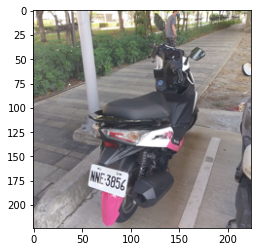

In [9]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
# import 匯入 當初預處理的方式
from tensorflow.keras.applications.mobilenet import preprocess_input 
p = df["path"]
idx = random.randint(0, len(p)-1)
img = Image.open(p[idx]).resize((224, 224)).convert("RGB")
img_np = np.array(img)

img_np_pre = preprocess_input(img_np)
print(img_np_pre)
plt.imshow(img)

In [10]:
x = np.array(df["path"])
y = np.array(df["ans"])

In [11]:
def data_generator(x, y, batch_size=38):
  while True:
    idx = np.random.randint(0, len(x), size=batch_size)
    x_batch, y_batch = x[idx], y[idx]
    x_final = []
    for path in x_batch:
      img = Image.open(path).resize((224, 224)).convert("RGB")    #  開啟路徑圖檔並改大小、轉成RGB
      img_pre = preprocess_input(np.array(img))              # 轉成陣列再預處理
      x_final.append(img_pre)            
    x_final = np.array(x_final)
    y_batch = np.array(y_batch)
    yield (x_final, y_batch)
gen = data_generator(x, y)
x_gen, y_gen = gen.__next__()
print(x_gen.shape)
print(y_gen.shape)
print(x_gen)
print(y_gen)


(38, 224, 224, 3)
(38,)
[[[[-0.04313725 -0.01960784 -0.27058822]
   [-0.6862745  -0.6784314  -0.79607844]
   [-0.41176468 -0.38039213 -0.4352941 ]
   ...
   [ 0.33333337  0.26274514 -0.05098039]
   [ 0.37254906  0.3176471  -0.02745098]
   [ 0.3803922   0.35686278 -0.01960784]]

  [[-0.04313725  0.01176476 -0.27843136]
   [-0.31764704 -0.30196077 -0.4588235 ]
   [-0.4352941  -0.41960782 -0.5372549 ]
   ...
   [ 0.48235297  0.427451    0.22352946]
   [ 0.5529412   0.48235297  0.254902  ]
   [ 0.49803925  0.4666667   0.20000005]]

  [[-0.25490195 -0.18431371 -0.5294118 ]
   [-0.4588235  -0.4823529  -0.7176471 ]
   [-0.4823529  -0.56078434 -0.7647059 ]
   ...
   [ 0.827451    0.8666667   0.8666667 ]
   [ 0.8666667   0.8901961   0.88235295]
   [ 0.90588236  0.92941177  0.9137255 ]]

  ...

  [[ 0.49803925  0.43529415  0.254902  ]
   [ 0.4901961   0.427451    0.24705887]
   [ 0.5058824   0.4431373   0.26274514]
   ...
   [-0.73333335 -0.84313726 -0.8980392 ]
   [-0.38039213 -0.54509807 -0.61

In [12]:
s2_x = x[y == 0]
gp_x = x[y == 1]
krv_x = x[y == 2]
fiddle_x = x[y == 3]
sr_x = x[y == 4]
vivo_x = x[y == 5]
famous_x = x[y == 6]
drg_x = x[y == 7]
duke_x = x[y == 8]
limi_x = x[y == 9]
gryphus6_x = x[y == 10]

print("s2 共:", len(s2_x))
print("gp 共:", len(gp_x))
print("krv 共:", len(krv_x))
print("fiddle 共:", len(fiddle_x))
print("sr 共:", len(sr_x))
print("vivo 共:", len(vivo_x))
print("famous 共:", len(famous_x))
print("drg 共:", len(drg_x))
print("duke 共:", len(duke_x))
print("limi 共:", len(limi_x))
print("gryphus6 共:", len(gryphus6_x))

s2 共: 822
gp 共: 979
krv 共: 861
fiddle 共: 1317
sr 共: 760
vivo 共: 860
famous 共: 876
drg 共: 900
duke 共: 1159
limi 共: 786
gryphus6 共: 1295


In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

 # "path": s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6,
    # "ans": [0] * len(s2) + [1] * len(gp) + [2] * len(krv) + [3] * len(fiddle) + [4] * len(sr) + [5] * len(vivo) + [6] * len(famous)
    # + [7] * len(drg) + [8] * len(duke) + [9] * len(limi) + [10] * len(gryphus6)
scooters = [s2_x, gp_x, krv_x, fiddle_x, sr_x, vivo_x, famous_x, drg_x, duke_x, limi_x, gryphus6_x]
scts_nums = []

for i in scooters:
  a = np.random.choice(i, 760, replace=False)
  b, c = train_test_split(a, test_size=0.1)
  num = (a, b, c)
  scts_nums.append(num)
# print(len(scts_nums[:][]))
# S2_380 = np.random.choice(S2_x, 380, replace=False)
# S2_342, S2_38 = train_test_split(S2_380, test_size=0.1)

a = 684
b = 76
x_train = np.concatenate([x[1] for x in scts_nums])
y_train = np.array([0] * a + [1]*a+[2]*a+[3]*a+[4]*a+[5]*a+[6]*a+[7]*a+[8]*a+[9]*a+[10]*a)

x_test = np.concatenate([x[2] for x in scts_nums])
y_test = np.array([0] * b + [1]*b+[2]*b+[3]*b+[4]*b+[5]*b+[6]*b+[7]*b+[8]*b+[9]*b+[10]*b)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7524,)
(836,)
(7524,)
(836,)


In [14]:
train_generator = data_generator(x_train, y_train)
test_generator = data_generator(x_test, y_test)

In [ ]:
# 20 * 19 => 380訓練
# 5 * 19 => 38測試
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
             EarlyStopping(patience=5, restore_best_weights=True),
             ModelCheckpoint("/content/drive/MyDrive/Tebame_第四組_機車辨識/機車辨識模型檔/VGG16_10款_1031_宇.h5", save_best_only=True)
]

model.fit(
    train_generator,
    steps_per_epoch=30,
    epochs=100,
    validation_data=test_generator,
    validation_steps=3, 
    callbacks=callbacks
                    )

Epoch 1/100
 2/30 [=>............................] - ETA: 9s - loss: 2.3313 - acc: 0.1842   